## Create Report Ready Phylogenetic Tree from Newick
### Example Notebook
Layout has been stolen wholeheartedly from [this article.](https://pbpython.com/notebook-process.html)

#### Summary
Using the Bio.Phylo module we will import a phylogenetic tree in Newick format, find the longest branch length, colour it red, output plot using matplotlib. Longest length from root to sample measured in nucleotides substitutions per site. This is a toy analysis example, over commented to exemplify some of the ten simple rules. 

#### Data
Example data: 
*tree.nhx*
* Sequenced _Vibrio cholera_ strains from [2010 Haitian outbreak](https://wwwnc.cdc.gov/eid/article/17/11/11-0794_article#tnF1)

**Exercise:** Modify _TREEFILE_ below to use different set

<!---
Note that the parameter included below is what is necessary to be changed in order to run this on other data sets.
-->

### Set Up
Get all back end dependencies arranged in order to run the analysis.

#### Imports
Python libraries

In [1]:
# Run this system command in a code cell if necessary: eg. troubleshooting "no module name Bio"
#!pip install biopython


In [2]:
# Import statements
from Bio import Phylo
from Bio.Phylo.PhyloXML import Phylogeny
import matplotlib.pyplot as plt

#### Parameters 
Changing filenames or other parameters (if added) as desired 

In [3]:
# Parameter for user to change to HCtreefull.nhx
# Haiti Cholera tree from Bioinformatics.ca workshop
# A newick format phylogenetic tree

TREEFILE = "../data/HCtreefull.nhx" # Note that the ../ is to go back to the main exercises folder from this one.




# Quick preview of tree - ugly so not included. Uncomment to run if desired
# print("Preview Newick Tree\n")
# f = open(TREEFILE, 'r')
# f_contents = f.read()
# print(f_contents)
# f.close()

#### Load Data and Convert 
Import tree file and convert to phyloXML format instead of newick. PhyloXML allows for more attributes (eg. colour, metadata) than Newick.

In [4]:
# Read in tree
tree = Phylo.read(TREEFILE, "newick")

# Convert to Phyloxml to allow inclusion of tree attributes beyond what Newick can do
tree = tree.as_phyloxml()
tree = Phylogeny.from_tree(tree)

print(TREEFILE, "has", len(tree.get_terminals()), "leaves.", "\n")
# print(tree) # Ugly for anything over the tiniest trees

../data/HCtreefull.nhx has 107 leaves. 



### Analysis Start

#### Find Depths
Use biopython functions to get clade depths from roots to tips


In [5]:
# Use biopython functions to run from the leaves to the root find the longest path
depths = tree.depths()
depths # Show clade objects with branch lengths

{Clade(): 0,
 Clade(branch_length=0.05099792, name='CP1032'): 0.05099792,
 Clade(branch_length=0.02531268): 0.02531268,
 Clade(branch_length=0.07351836, name='CP1041'): 0.09883104000000001,
 Clade(branch_length=0.01325577): 0.038568450000000004,
 Clade(branch_length=0.05378664): 0.09235509,
 Clade(branch_length=0.01988756, name='CP1042'): 0.11224265,
 Clade(branch_length=0.03146006): 0.12381515,
 Clade(branch_length=1e-08, name='vc-20'): 0.12381516,
 Clade(branch_length=8e-08): 0.12381523,
 Clade(branch_length=0.00354967, name='vc-4'): 0.1273649,
 Clade(branch_length=0.00532988): 0.12914511,
 Clade(branch_length=0.00177086, name='vc-11'): 0.13091597000000002,
 Clade(branch_length=1.2e-07): 0.12914523,
 Clade(branch_length=0.00177086, name='vc-22'): 0.13091609,
 Clade(branch_length=8e-08): 0.12914531,
 Clade(branch_length=1e-08, name='vc-9'): 0.12914532,
 Clade(branch_length=1.5e-07): 0.12914546000000002,
 Clade(branch_length=1e-08, name='vc-8'): 0.12914547,
 Clade(branch_length=1.2e-07

#### Find farthest leaf and longest path
Use biopython functions to run from the leaves to the root find the longest path.

Farthest leaf sorts the depths dictionary by value to find the longest one.
Longest path grabs the max of those values.


In [6]:
farthestleaf = sorted(depths, key = depths.get)[-1].name
longestpath = depths.get(max(depths, key = depths.get), "no longest value found")

#### Apply Colouring to branch at farthest leaf

common_ancestor() grabs the branch below it to colour


In [7]:
# Colour the tree accordingly: highlight the longest path
tree.root.color = "gray" 
longest = tree.common_ancestor({"name": farthestleaf})
longest.color = "red"

### Create figure

Use notebook [magics](https://towardsdatascience.com/the-top-5-magic-commands-for-jupyter-notebooks-2bf0c5ae4bb8) and matplot to draw a nice tree.

Print the result as well.

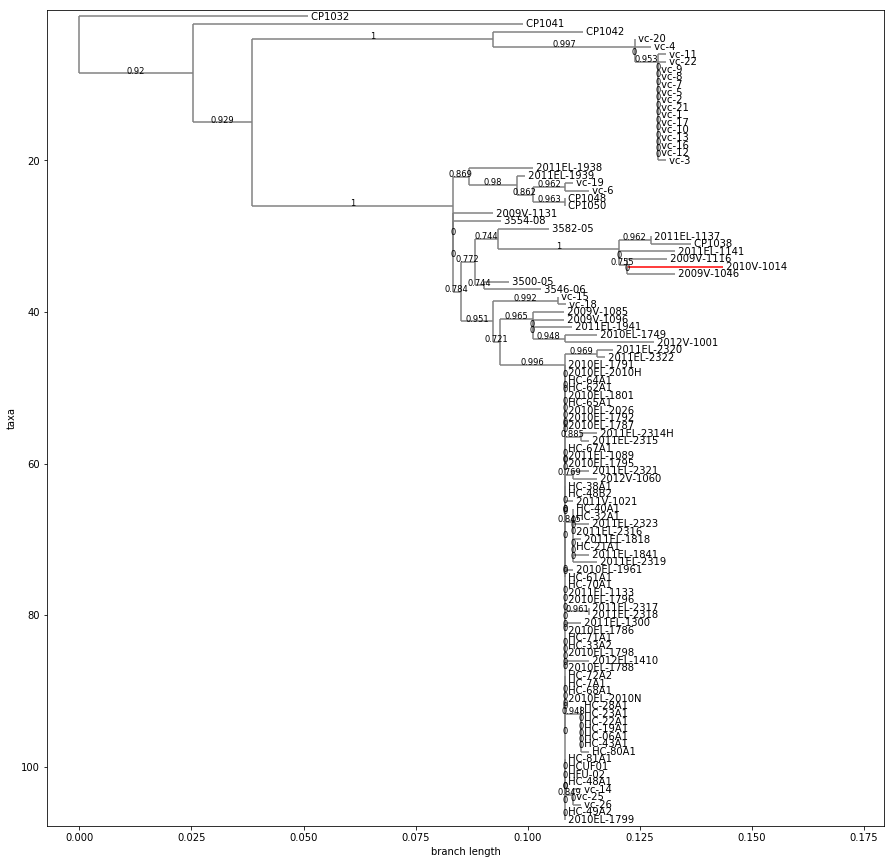

In [8]:
# This is an example of notebook magics. Something to look up later from the handouts.
%matplotlib inline 
tree.rooted = True

# Draw using matplotlib
plt.rcParams["figure.figsize"] = (15,15)
Phylo.draw(tree)

In [9]:
# Print out a result
print("The longest total path from root to leaf is:", longestpath, "and the sameple there is:", farthestleaf)

The longest total path from root to leaf is: 0.14355376 and the sameple there is: 2010V-1014
